## Read Data from CSV and Calculate DQI

**Description**: Read data from a CSV file, identify errors as missing values, and calculate the DQI.

In [3]:
# Write your code from here
import pandas as pd
import numpy as np

def calculate_dqi_completeness(df):
    """
    Calculates a simple Data Quality Index (DQI) based on completeness.
    DQI is represented as the percentage of non-missing values.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        float: The DQI score (0 to 100), or 0 if the DataFrame is empty.
        pd.DataFrame: A DataFrame showing missing value counts per column.
    """
    if df.empty:
        print("DataFrame is empty, DQI cannot be calculated.")
        return 0.0, pd.DataFrame()

    total_cells = df.size
    missing_cells = df.isnull().sum().sum()
    non_missing_cells = total_cells - missing_cells

    if total_cells == 0:
        dqi_score = 0.0
    else:
        dqi_score = (non_missing_cells / total_cells) * 100

    missing_info = pd.DataFrame({
        'Missing_Count': df.isnull().sum(),
        'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
    })

    return dqi_score, missing_info

# --- Main execution ---

csv_file_path = 'sample_data.csv'

try:
    # Read data from the CSV file
    df = pd.read_csv(csv_file_path)
    print("Original DataFrame:")
    print(df)
    print("-" * 30)

    # Calculate DQI based on completeness
    dqi_score, missing_info = calculate_dqi_completeness(df)

    print("\nMissing Value Information per Column:")
    print(missing_info)
    print("-" * 30)

    print(f"\nOverall Data Quality Index (DQI) - Completeness: {dqi_score:.2f}%")

except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found. Please ensure it's in the same directory or provide the full path.")
except pd.errors.EmptyDataError:
    print(f"Error: The file '{csv_file_path}' is empty.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Original DataFrame:
      Name   Age      City   Salary
0    Alice  25.0  New York  50000.0
1      Bob   NaN    London  60000.0
2  Charlie  35.0       NaN  75000.0
3    David  30.0  New York      NaN
4      Eve  40.0     Paris  90000.0
5    Frank   NaN    Berlin      NaN
------------------------------

Missing Value Information per Column:
        Missing_Count  Missing_Percentage
Name                0            0.000000
Age                 2           33.333333
City                1           16.666667
Salary              2           33.333333
------------------------------

Overall Data Quality Index (DQI) - Completeness: 79.17%


### Visualize Basic DQI with Bar Plot

**Description**: Create a bar plot for DQI and errors in a dataset.

DataFrame Loaded Successfully:
      Name   Age      City   Salary
0    Alice  25.0  New York  50000.0
1      Bob   NaN    London  60000.0
2  Charlie  35.0       NaN  75000.0
3    David  30.0  New York      NaN
4      Eve  40.0     Paris  90000.0
5    Frank   NaN    Berlin      NaN
------------------------------

Missing Value Information per Column:
        Missing_Count  Missing_Percentage
Column                                   
Name                0            0.000000
Age                 2           33.333333
City                1           16.666667
Salary              2           33.333333
------------------------------

Overall Data Quality Index (DQI) - Completeness: 79.17%


/tmp/ipykernel_12433/3464563006.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Overall DQI'], y=[dqi_score], ax=axes[0], palette='viridis')
/tmp/ipykernel_12433/3464563006.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_info.index, y='Missing_Count', data=missing_info, ax=axes[1], palette='flare')


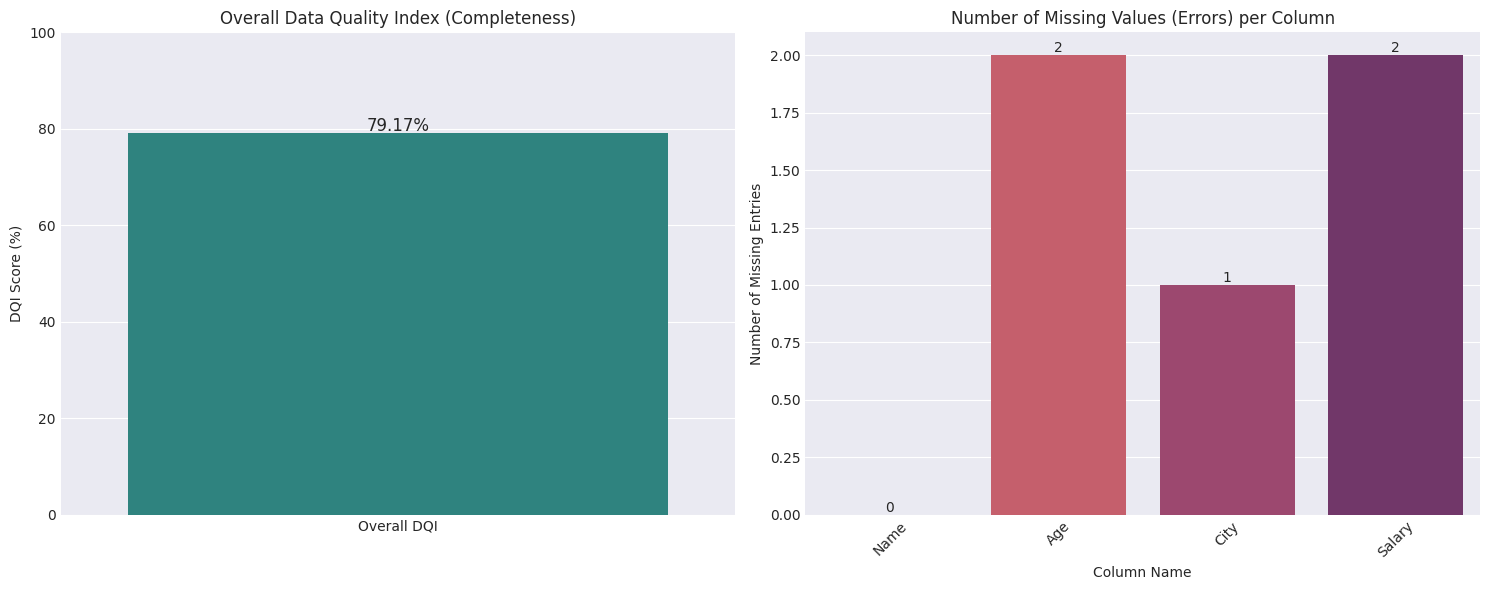

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def calculate_dqi_completeness(df):
    """
    Calculates a simple Data Quality Index (DQI) based on completeness.
    DQI is represented as the percentage of non-missing values.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        float: The DQI score (0 to 100), or 0 if the DataFrame is empty.
        pd.DataFrame: A DataFrame showing missing value counts and percentages per column.
    """
    if df.empty:
        print("DataFrame is empty, DQI cannot be calculated.")
        return 0.0, pd.DataFrame()

    total_cells = df.size
    missing_cells = df.isnull().sum().sum()
    non_missing_cells = total_cells - missing_cells

    if total_cells == 0:
        dqi_score = 0.0
    else:
        dqi_score = (non_missing_cells / total_cells) * 100

    missing_info = pd.DataFrame({
        'Missing_Count': df.isnull().sum(),
        'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
    })
    missing_info.index.name = 'Column' # Name the index for better plotting

    return dqi_score, missing_info

def visualize_dqi(dqi_score, missing_info):
    """
    Creates bar plots for DQI (completeness) and errors (missing values).

    Args:
        dqi_score (float): The overall DQI score (completeness).
        missing_info (pd.DataFrame): DataFrame with missing counts and percentages per column.
    """
    plt.style.use('seaborn-v0_8-darkgrid') # Use a nice style

    fig, axes = plt.subplots(1, 2, figsize=(15, 6)) # 1 row, 2 columns of plots

    # Plot 1: Overall DQI Score
    sns.barplot(x=['Overall DQI'], y=[dqi_score], ax=axes[0], palette='viridis')
    axes[0].set_ylim(0, 100)
    axes[0].set_title('Overall Data Quality Index (Completeness)')
    axes[0].set_ylabel('DQI Score (%)')
    # Add the DQI score text on the bar
    for p in axes[0].patches:
        axes[0].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12)

    # Plot 2: Missing Values (Errors) per Column
    if not missing_info.empty:
        sns.barplot(x=missing_info.index, y='Missing_Count', data=missing_info, ax=axes[1], palette='flare')
        axes[1].set_title('Number of Missing Values (Errors) per Column')
        axes[1].set_ylabel('Number of Missing Entries')
        axes[1].set_xlabel('Column Name')
        axes[1].tick_params(axis='x', rotation=45) # Rotate x-axis labels if too long

        # Add counts on top of bars
        for p in axes[1].patches:
            axes[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)
    else:
        axes[1].text(0.5, 0.5, 'No missing values detected.', horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes, fontsize=14)
        axes[1].set_title('No Missing Values')
        axes[1].axis('off') # Turn off axes if no data

    plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
    plt.show()

# --- Main execution ---

# First, ensure your sample_data.csv exists from the previous step,
# or create it using the content provided earlier.
csv_file_path = 'sample_data.csv' # Make sure this path is correct

try:
    df = pd.read_csv(csv_file_path)
    print("DataFrame Loaded Successfully:")
    print(df)
    print("-" * 30)

    dqi_score, missing_info = calculate_dqi_completeness(df)
    print("\nMissing Value Information per Column:")
    print(missing_info)
    print("-" * 30)

    print(f"\nOverall Data Quality Index (DQI) - Completeness: {dqi_score:.2f}%")

    # Visualize the DQI and errors
    visualize_dqi(dqi_score, missing_info)

except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found. Please ensure it's in the same directory or provide the full path.")
    print("Please create 'sample_data.csv' with the following content:")
    print("```csv")
    print("Name,Age,City,Salary")
    print("Alice,25,New York,50000")
    print("Bob,,London,60000")
    print("Charlie,35,,75000")
    print("David,30,New York,")
    print("Eve,40,Paris,90000")
    print("Frank,,Berlin,")
    print("```")
except pd.errors.EmptyDataError:
    print(f"Error: The file '{csv_file_path}' is empty.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")